Dataset shape: (550, 41)

Features (18): ['cylinders_scaled', 'displacement_scaled', 'year_scaled', 'vehicle_age_scaled', 'make_encoded', 'class_encoded', 'drive_encoded', 'fuel_type_encoded', 'transmission_encoded', 'size_category_encoded', 'drivetrain_type_encoded', 'is_high_performance', 'is_luxury', 'is_electric', 'is_diesel', 'is_hybrid', 'is_automatic', 'is_manual']
X shape: (550, 18), y shape: (550,)

Train size: 440, Test size: 110

=== Default Extra Trees ===
R²  : 0.8305
MAE : 1.2325
RMSE: 2.1021

=== Tuning Results ===
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Best cross‑validation R²: 0.9049

=== Tuned Extra Trees ===
R²  : 0.8145
MAE : 1.3908
RMSE: 2.1988


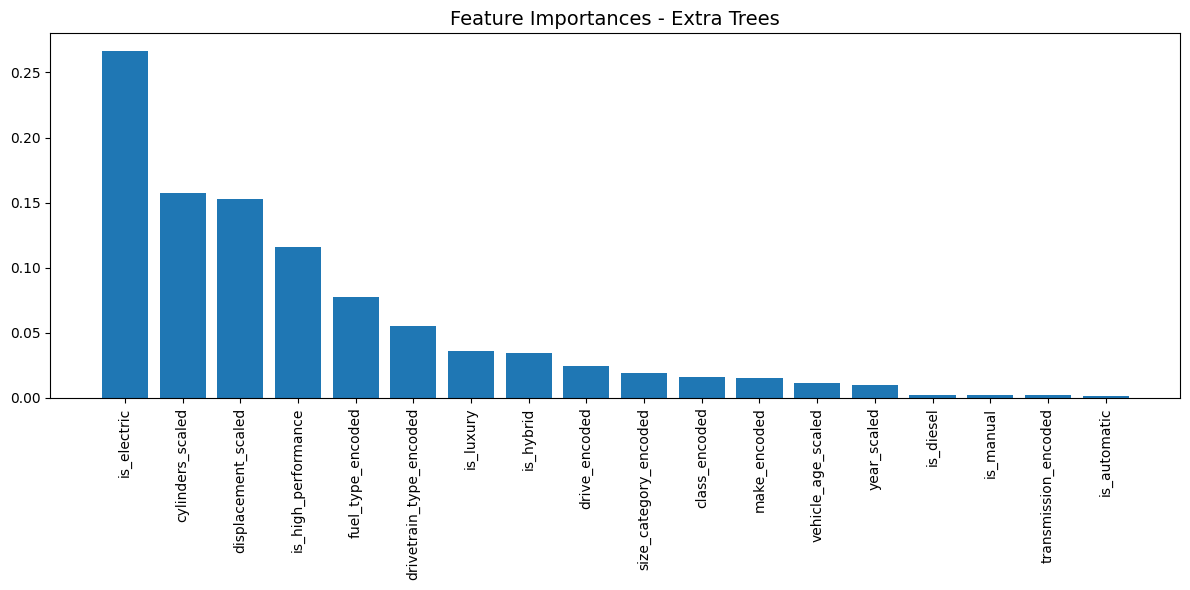


=== Random Forest (Default) ===
R²  : 0.8220
MAE : 1.3280
RMSE: 2.1540

✅ Done.


In [2]:
import warnings
warnings.filterwarnings('ignore')




# ============================================================
# Extra Trees Regressor on Car Fuel Economy Data
# ============================================================
# This cell trains an Extra Trees model to predict combined MPG
# using pre‑scaled numeric features and encoded categoricals.
# It includes baseline evaluation, hyperparameter tuning,
# feature importance, and a Random Forest comparison.
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Load data (assumes 'Car Data P.csv' is in working directory)
# ------------------------------------------------------------
df = pd.read_csv('Car Data P.csv')
print("Dataset shape:", df.shape)

# ------------------------------------------------------------
# 2. Define target and features (no target leakage)
# ------------------------------------------------------------
target = 'combination_mpg'
y = df[target]

feature_cols = [
    'cylinders_scaled',
    'displacement_scaled',
    'year_scaled',
    'vehicle_age_scaled',
    'make_encoded',
    'class_encoded',
    'drive_encoded',
    'fuel_type_encoded',
    'transmission_encoded',
    'size_category_encoded',
    'drivetrain_type_encoded',
    'is_high_performance',
    'is_luxury',
    'is_electric',
    'is_diesel',
    'is_hybrid',
    'is_automatic',
    'is_manual'
]

X = df[feature_cols]

print(f"\nFeatures ({len(feature_cols)}): {feature_cols}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# ------------------------------------------------------------
# 3. Train / test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTrain size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

# ------------------------------------------------------------
# 4. Baseline Extra Trees Regressor (default parameters)
# ------------------------------------------------------------
et_default = ExtraTreesRegressor(random_state=42, n_jobs=-1)
et_default.fit(X_train, y_train)
y_pred_default = et_default.predict(X_test)

print("\n=== Default Extra Trees ===")
print(f"R²  : {r2_score(y_test, y_pred_default):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_default):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_default)):.4f}")

# ------------------------------------------------------------
# 5. Hyperparameter tuning with RandomizedSearchCV
# ------------------------------------------------------------
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

et_tune = ExtraTreesRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    et_tune, param_dist, n_iter=30,
    cv=5, scoring='r2', random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

print("\n=== Tuning Results ===")
print("Best parameters:", random_search.best_params_)
print("Best cross‑validation R²: {:.4f}".format(random_search.best_score_))

# ------------------------------------------------------------
# 6. Evaluate tuned model on test set
# ------------------------------------------------------------
best_et = random_search.best_estimator_
y_pred_tuned = best_et.predict(X_test)

print("\n=== Tuned Extra Trees ===")
print(f"R²  : {r2_score(y_test, y_pred_tuned):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_tuned):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tuned)):.4f}")

# ------------------------------------------------------------
# 7. Feature importance (from tuned model)
# ------------------------------------------------------------
importances = best_et.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances - Extra Trees", fontsize=14)
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_cols[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 8. Optional: Compare with Random Forest (default)
# ------------------------------------------------------------
rf_default = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_default.fit(X_train, y_train)
y_pred_rf = rf_default.predict(X_test)

print("\n=== Random Forest (Default) ===")
print(f"R²  : {r2_score(y_test, y_pred_rf):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")

print("\n✅ Done.")